In [354]:
import csv
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import sys

sys.path.append(os.path.join('util'))
from load_data_basic import getParticipantIDJobShift, getParticipantID
from load_data_basic import getParticipantStartTime, getParticipantEndTime

main_data_directory = '../data/keck_wave1/2_preprocessed_data'
individual_timeline_directory = 'output/individual_timeline'

IDs = getParticipantID(main_data_directory)

sleep_after_work = pd.DataFrame()
sleep_before_work = pd.DataFrame()

sleep_off_work = pd.DataFrame()

for user_id in IDs.index:
    participant_id = IDs.loc[user_id].values[0]
    participant_timeline = pd.read_csv(os.path.join(individual_timeline_directory, participant_id + '.csv'))
    
    for index, row in participant_timeline.iterrows():
        if row['type'] == 'sleep':
            if row['is_sleep_before_work'] == 1:
                sleep_before_work = sleep_before_work.append(row)
                
            if row['is_sleep_after_work'] == 1:
                sleep_after_work = sleep_after_work.append(row)
                
            if row['is_sleep_after_work'] != 1 and row['is_sleep_before_work'] != 1:
                sleep_off_work = sleep_off_work.append(row)
            




## Plot sleep duration

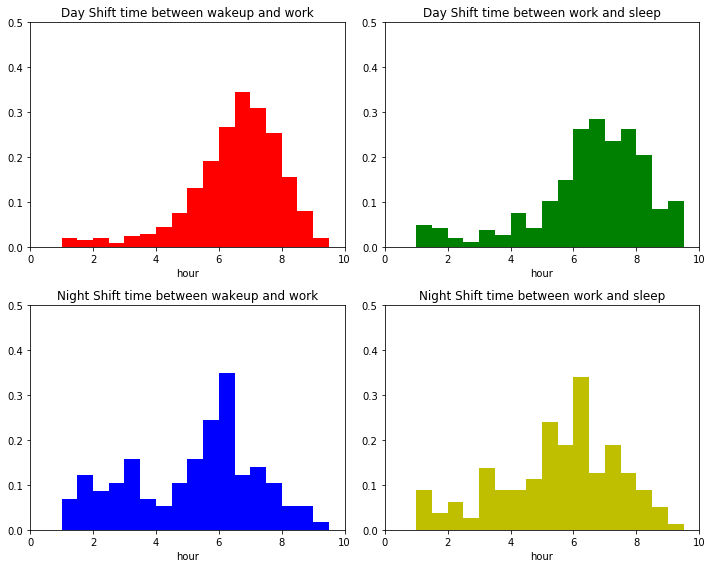

In [355]:
data = []

# Day shift
day_shift_sleep_before_work = sleep_before_work.loc[sleep_before_work['shift_type'] == 1]
day_shift_sleep_duration_before_work = np.array(day_shift_sleep_before_work['duration_in_seconds']) / 3600
data.append(day_shift_sleep_duration_before_work)

day_shift_sleep_after_work = sleep_after_work.loc[sleep_after_work['shift_type'] == 1]
day_shift_sleep_duration_after_work = np.array(day_shift_sleep_after_work['duration_in_seconds']) / 3600
data.append(day_shift_sleep_duration_after_work)

# Night shift
night_shift_sleep_before_work = sleep_before_work.loc[sleep_before_work['shift_type'] == 0]
night_shift_sleep_duration_before_work = np.array(night_shift_sleep_before_work['duration_in_seconds']) / 3600
data.append(night_shift_sleep_duration_before_work)

night_shift_sleep_after_work = sleep_after_work.loc[sleep_after_work['shift_type'] == 0]
night_shift_sleep_duration_after_work = np.array(night_shift_sleep_after_work['duration_in_seconds']) / 3600
data.append(night_shift_sleep_duration_after_work)

# color
color = ['r', 'g', 'b', 'y']

# Title
title = ['Day Shift time between wakeup and work', 'Day Shift time between work and sleep',
         'Night Shift time between wakeup and work', 'Night Shift time between work and sleep']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

for i in range(len(axes.flatten())):
    axes[int(i / 2), int(i % 2)].set_xlim([0, 10])
    axes[int(i / 2), int(i % 2)].set_ylim([0, 0.5])
    axes[int(i / 2), int(i % 2)].set_xlabel('hour', fontsize=10)
    
    axes[int(i / 2), int(i % 2)].hist(list(data[i]), normed=True, bins=num_of_bins, color=color[i])
    axes[int(i / 2), int(i % 2)].set_title(title[i])

fig.tight_layout()
plt.show()

## Extract Sleep duration when it is not on work days

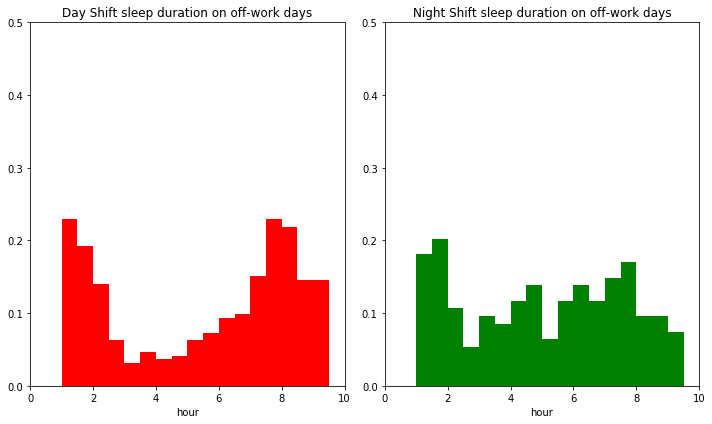

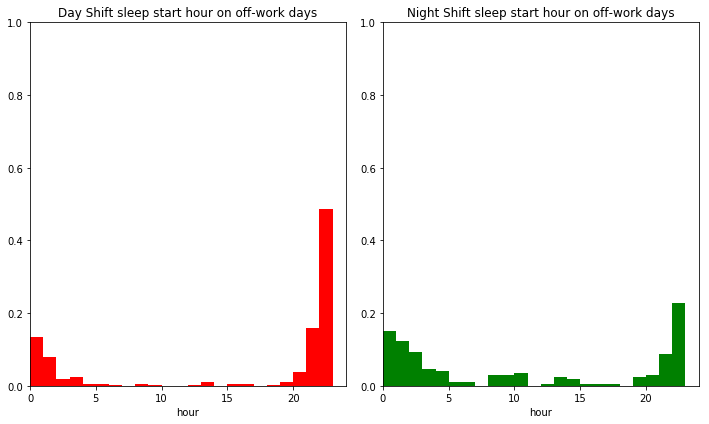

In [407]:
data = []

# Day shift
day_shift_sleep_off_work_days = sleep_off_work.loc[sleep_off_work['shift_type'] == 1]
day_shift_sleep_off_work_days = np.array(day_shift_sleep_off_work_days['duration_in_seconds']) / 3600
data.append(day_shift_sleep_off_work_days)

# Night shift
night_shift_sleep_off_work_days = sleep_off_work.loc[sleep_off_work['shift_type'] == 0]
night_shift_sleep_off_work_days = np.array(night_shift_sleep_off_work_days['duration_in_seconds']) / 3600
data.append(night_shift_sleep_off_work_days)

# color
color = ['r', 'g']

# Title
title = ['Day Shift sleep duration on off-work days', 'Night Shift sleep duration on off-work days']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))

num_of_bins = np.arange(0, 10, 0.5)

for i in range(len(axes.flatten())):
    axes[i].set_xlim([0, 10])
    axes[i].set_ylim([0, 0.5])
    axes[i].set_xlabel('hour', fontsize=10)
    
    axes[i].hist(list(data[i]), normed=True, bins=num_of_bins, color=color[i])
    axes[i].set_title(title[i])

fig.tight_layout()
plt.show()


data = []

# Day shift
day_shift_sleep_off_work_days = sleep_off_work.loc[sleep_off_work['shift_type'] == 1]
day_shift_sleep_off_work_days = day_shift_sleep_off_work_days.loc[day_shift_sleep_off_work_days['duration_in_seconds'] > 3600 * 3]
day_shift_sleep_off_work_days = pd.to_datetime(day_shift_sleep_off_work_days['start_recording_time'])
day_shift_sleep_off_work_days = np.array([time.hour for time in day_shift_sleep_off_work_days])

data.append(day_shift_sleep_off_work_days)

# Night shift
night_shift_sleep_off_work_days = sleep_off_work.loc[sleep_off_work['shift_type'] == 0]
night_shift_sleep_off_work_days = night_shift_sleep_off_work_days.loc[night_shift_sleep_off_work_days['duration_in_seconds'] > 3600 * 3]
night_shift_sleep_off_work_days = pd.to_datetime(night_shift_sleep_off_work_days['start_recording_time'])
night_shift_sleep_off_work_days = np.array([time.hour for time in night_shift_sleep_off_work_days])

data.append(night_shift_sleep_off_work_days)

# color
color = ['r', 'g']

# Title
title = ['Day Shift sleep start hour on off-work days', 'Night Shift sleep start hour on off-work days']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))

num_of_bins = range(0, 24, 1)

for i in range(len(axes.flatten())):
    axes[i].set_xlim([0, 24])
    axes[i].set_ylim([0, 1])
    axes[i].set_xlabel('hour', fontsize=10)
    
    axes[i].hist(list(data[i]), normed=True, bins=num_of_bins, color=color[i])
    axes[i].set_title(title[i])

fig.tight_layout()
plt.show()




## Extract day shift and night shift data

## Before and after work sleep start and end time in the day

## Before and after work sleep duration

## Before and after work sleep efficiency

## Before and after work sleep deep

## Before and after work sleep light

## Before and after work sleep rem